# Introduction

This Data Analysis project analyses the relationship between Gross Domestic Product and Life Expectancy at birth. The effects of socioeconomic output on Life Expectancy on six candidate countries named **Chile**, **China**, **Germany**, **Mexico**, **United States of America**, and **Zimbabwe** will be investigated.

This objective of this project is to get insights on these questions:
- How has life expectancy increased or decreased over time in the six nations?
- Is there increase in GDP in the six nations over time?
- Does GDP and life expectancy of a country have correlation between them?
- What are the nations' average life expectancy?
- What is the distribution of that life expectancy?

# Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the Data

In [2]:
data = pd.read_csv('all_data.csv')
data.head()

Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

Check shape of **gpd**

In [3]:
data.shape

(96, 4)

# Explore the Data

In [4]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

**Country** series shows that there are six countries: Chile, Germany, Mexico, United States of America, and Zimbabwe

Find out the years in **Year** series

In [5]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

# Cleaning Column Name

### Reasons
- Most column names are one word, however the third column is not one word. Changing it to one word for consistency
- The *Life expectancy at birth (years)* column is descriptive, which is good for labeling the axis, but a little difficult to wrangle for coding the plot itself.

In [6]:
# Using rename function to change column name
data = data.rename({"Life expectancy at birth (years)":"LEABY"}, axis="columns")
data.head()

Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10

# Exploratory Plots

## Quantitative

### Life Expectancy

In [7]:
mean_leaby = np.mean(data.LEABY)
median_leaby = np.median(data.LEABY)
mode_leaby = stats.mode(data.LEABY)
print(f"Mean = {mean_leaby}")
print(f"Median = {median_leaby}")
print(f"Mode = {mode_leaby[0][0]}")

Mean = 72.78958333333334
Median = 76.75
Mode = 75.0


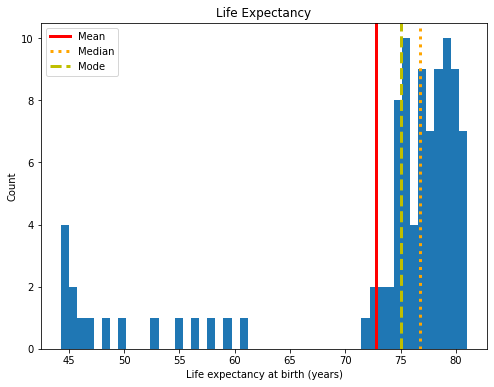

In [8]:
plt.figure(figsize=(8,6))
plt.hist(data.LEABY, bins=50)
plt.title("Life Expectancy")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Count")
plt.axvline(mean_leaby, color="r", linestyle="solid", linewidth=3, label="Mean")
plt.axvline(median_leaby, color="orange", linestyle="dotted", linewidth=3, label="Median")
plt.axvline(mode_leaby[0][0], color="y", linestyle="dashed", linewidth=3, label="Mode")
plt.legend()
plt.show()

Exploring **LEABY** data through plots shows that the distribution is very left skewed whereby the larger quantity of the data is on the right-hand side.

### GDP

In [9]:
mean_gdp = np.mean(data.GDP)
median_gdp = np.median(data.GDP)
mode_gdp = stats.mode(data.GDP)
print(f"Mean = {mean_gdp}")
print(f"Median = {median_gdp}")
print(f"Mode = {mode_gdp[0][0]}")

Mean = 3880498570768.396
Median = 1280220000000.0
Mode = 4415702800.0


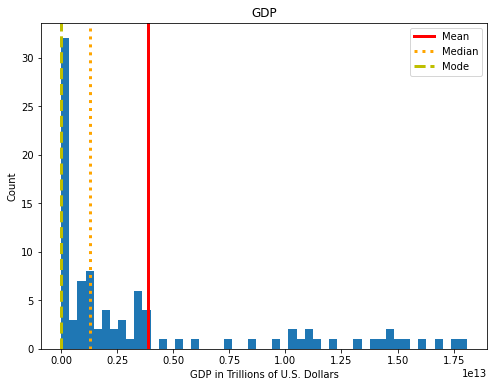

In [10]:
plt.figure(figsize=(8,6))
plt.hist(data.GDP, bins=50)
plt.title("GDP")
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Count")
plt.axvline(mean_gdp, color="r", linestyle="solid", linewidth=3, label="Mean")
plt.axvline(median_gdp, color="orange", linestyle="dotted", linewidth=3, label="Median")
plt.axvline(mode_gdp[0][0], color="y", linestyle="dashed", linewidth=3, label="Mode")
plt.legend()
plt.show()

**GDP** distribution was analysed next. Here, **GDP** distribution is very right skewed where majority of data are on the left-hand side. This is the opposite of the **LEABY** column. 

Another description for this distribution is the *power law distribution*. This means that there is a a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities: one quantity varies as a power of another. More here ->  https://en.wikipedia.org/wiki/Power_law

# Bivariate

## One Quantitative and One Categoral

#### Box Plots

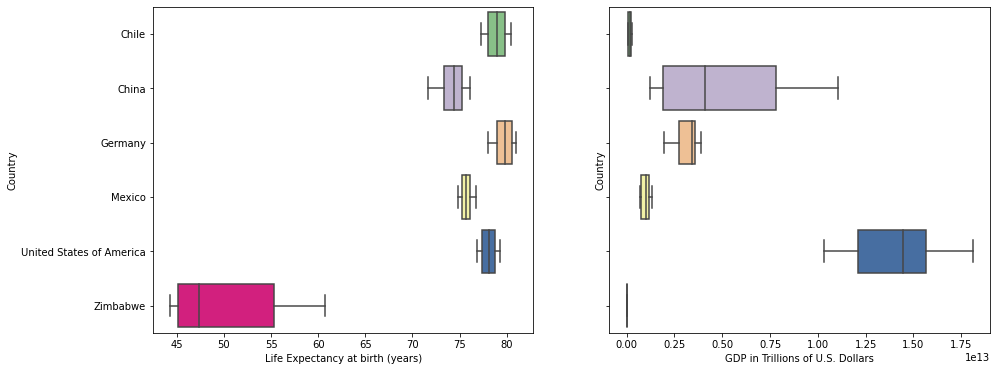

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
axes[0] = sns.boxplot(ax=axes[0], x='LEABY', y='Country', data=data, palette='Accent')
axes[0].set_xlabel("Life Expectancy at birth (years)")
axes[1] = sns.boxplot(ax=axes[1], x='GDP', y='Country', data=data, palette='Accent')
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

The relationship between each **Country** and **LEABY**, and each **Country** and **GDP** was visually summarized using Box plots. The Box plots showed the 25th percentile, 75th percentile, the Interquartile range, the whiskers which indicates outside the upper and lower quartiles, and the mean of each country's data. 

- The Box plot for **LEABY** shows that all countries except for Zimbabwe have an average Life Expectancy of above 70
- The Box pot for **GDP** displays US having the highest value compared to other countries. Zimbabwe has a very low **GDP** which is almost like they have nothing compared to the US, while Chile is the second country with a very low **GDP**

#### Violin Plots

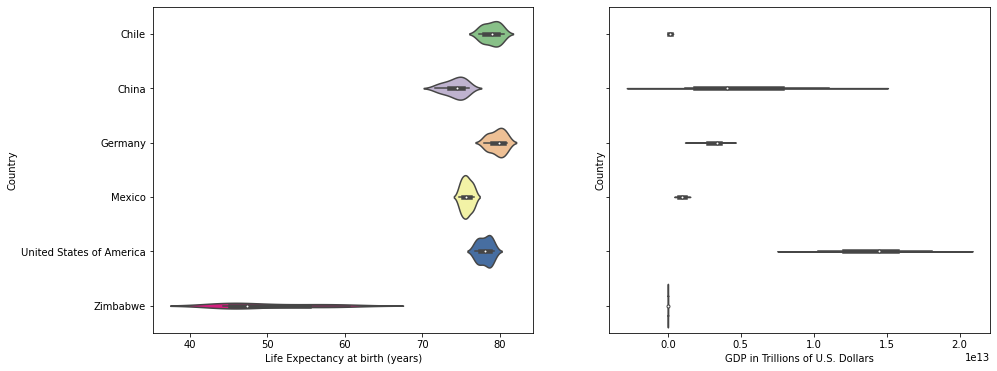

In [12]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
axes[0] = sns.violinplot(ax=axes[0], x='LEABY', y='Country', data=data, palette='Accent')
axes[0].set_xlabel("Life Expectancy at birth (years)")
axes[1] = sns.violinplot(ax=axes[1], x='GDP', y='Country', data=data, palette='Accent')
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Continued analysis of categorical and quantitative data with Violin Plots. Violin Plot compared the data by looking for patterns in shapes via distributions of the data. It shows the shape of the distribution compared to the Box Plots.

- The Violin Plot for Life Expectancy shows Zimbabwe with a range between 30s and 60s, compared to other countries with shorter ranges
- The Violin Plot for GDP shows China and US having with wider ranges, whereas the rest countries have shorter ranges.

#### Swarm Plots

C:\Users\Jo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


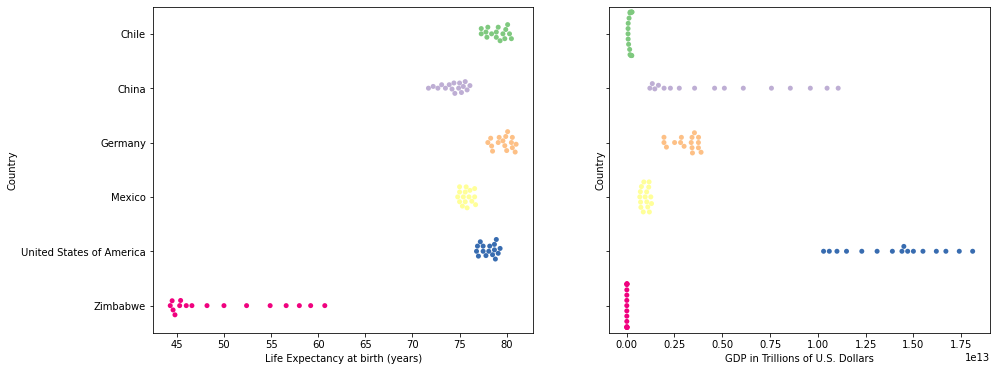

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
axes[0] = sns.swarmplot(ax=axes[0], x='LEABY', y='Country', data=data, palette='Accent')
axes[0].set_xlabel("Life Expectancy at birth (years)")
axes[1] = sns.swarmplot(ax=axes[1], x='GDP', y='Country', data=data, palette='Accent')
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Swarm Plots complement Box Plots and Violin Plots as they show dot density around the values as well as distribution through area/shape.

- GDP show Chile and Zimbabwe having vertical line of dots which illustrate the number of data points that fall around their values.

C:\Users\Jo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


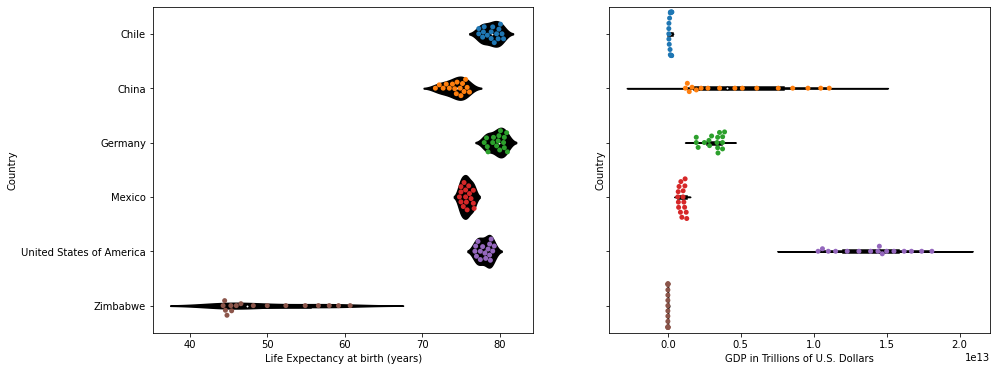

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
axes[0] = sns.violinplot(ax=axes[0], x='LEABY', y='Country', data=data, color='k')
axes[0] = sns.swarmplot(ax=axes[0], x='LEABY', y='Country', data=data)
axes[0].set_xlabel("Life Expectancy at birth (years)")
axes[1] = sns.violinplot(ax=axes[1], x='GDP', y='Country', data=data, color='k')
axes[1] = sns.swarmplot(ax=axes[1], x='GDP', y='Country', data=data)
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

## Two Quantitative

#### Scatter Plots

C:\Users\Jo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


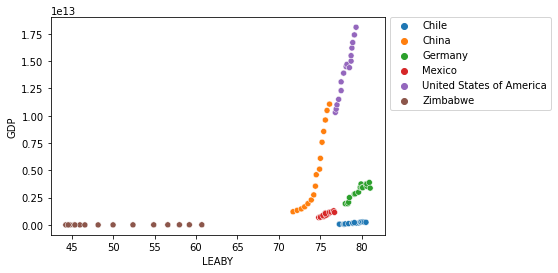

In [15]:
sns.scatterplot(data.LEABY, data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.79), ncol=1)
plt.show()

This Scatter Plot describes the relationship between the quantitative variables **LEABY** and **GDP**

- The Scatter Plot describes that all countries except for Zimbabwe have increase in GDP and Life Expectancy.
- China and US have more GDP slope increase in their relationship between GDP and Life Expectancy than the rest of the countries.

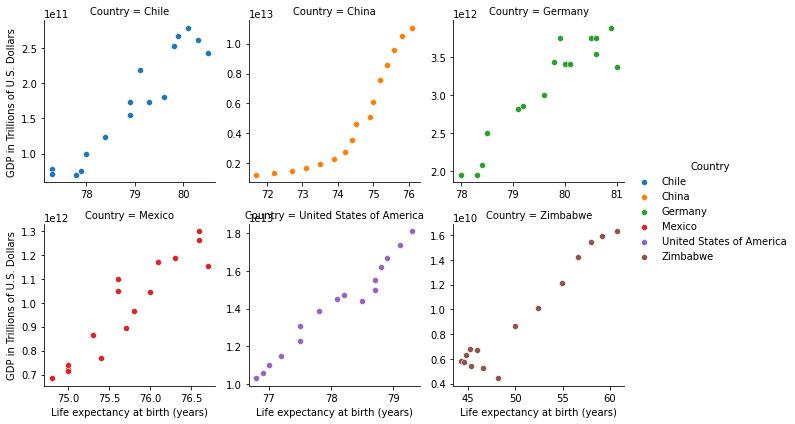

In [16]:
graph = sns.FacetGrid(data, col='Country', col_wrap=3, hue="Country", sharey=False, sharex=False)
graph.map(sns.scatterplot, "LEABY", "GDP").add_legend()\
.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars");

- These graphs exhibits that each country had a positive correlation, indicating that there is an increase in GDP and Life Expectancy.
- China has a slightly exponential curve in their relationship between GDP and Life Expectancy.
- Chile shows a logarithimic relationship between GDP and Life Expectancy.
- Countries such as Zimbabwe, Mexico and US have linear relationships between GDP and Life Expectancy

# Time Series

#### Line Charts

##### Year and Life Expectancy

C:\Users\Jo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


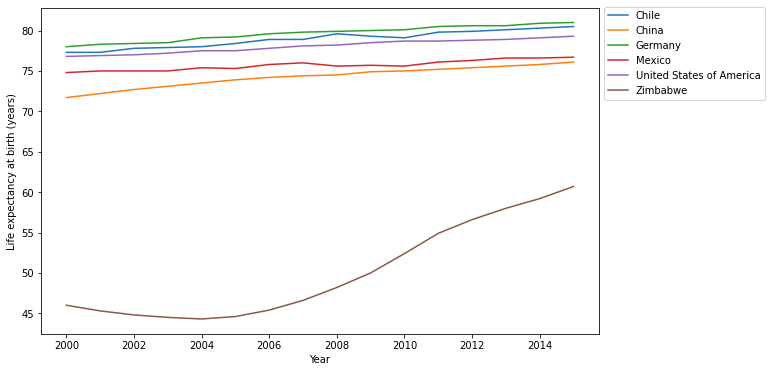

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data.Year, data.LEABY, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.86), ncol=1);
plt.ylabel('Life expectancy at birth (years)')
plt.show()

The Line Plot displays the time series data of relationship between Year and Life Expectancy.

- All countries except Zimbabwe seem have steady growth in their Life Expectancy spanning the years from 2000-2015.
- Zimbabwe had a decrease in Life Expectancy from 2000-2004. However, the graph also shows Zimbabwe having an increase in Life Expectancy after 2004 till 2015.

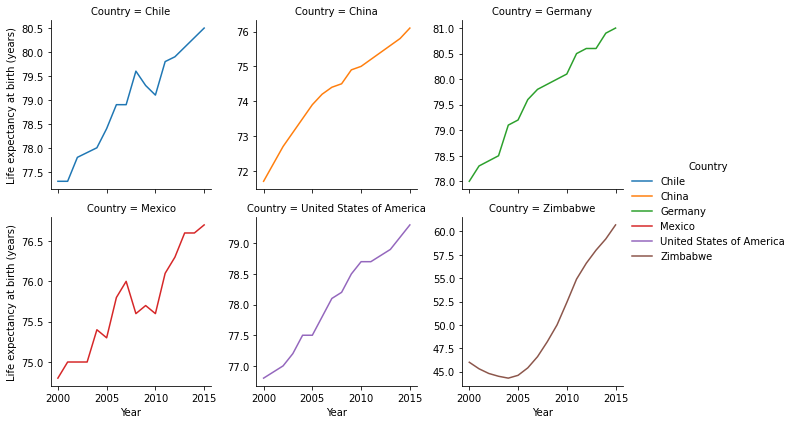

In [18]:
graph_leaby = sns.FacetGrid(data, col='Country', col_wrap=3, hue='Country', sharey=False)
graph_leaby.map(sns.lineplot, "Year", "LEABY").add_legend()\
.set_axis_labels("Year", "Life expectancy at birth (years)")
plt.show()

These graphs show increase Life Expectancy over time.

- Albeit all countries show growth in Life Expectancy, there are also linear changes as it increases over time.

##### Year and GDP

C:\Users\Jo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


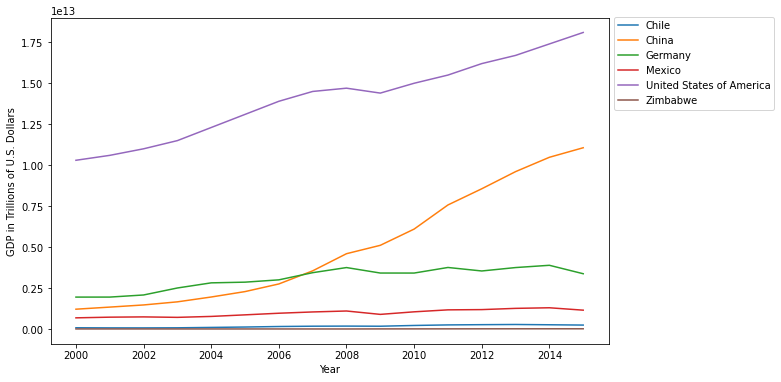

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data.Year, data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.86), ncol=1);
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

The Line Plot displays the time series data of relationship between Year and GDP.

- Compared to other countries, US and China have more increase in GDP through the years from 2000 - 2015.
- Other countries don't have much change in their GDP.

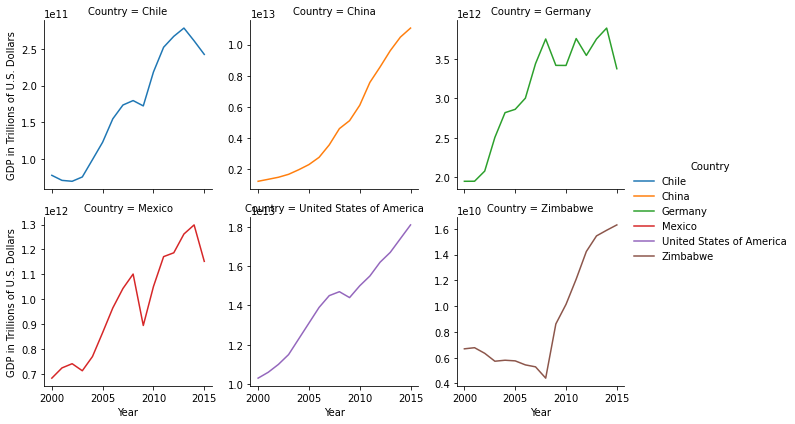

In [20]:
gdp_graph = sns.FacetGrid(data, col='Country', col_wrap=3, hue='Country', sharey = False)
gdp_graph.map(sns.lineplot, "Year", "GDP").add_legend()\
.set_axis_labels("Year", "GDP in Trillions of U.S. Dollars")
plt.show()

These graphs show the increase and decrease of GDP over time from 2000-2015 for each country.

- As displayed, each country had growth in GDP in the span from 2000 till 2015.
- China seem to be the only country that had steady increase in GDP.
- Other countries had fluctuating GDP. Even though there was continuous increase, there seem to be times in which they was decrease.

# Conclusions

There were quite a few data visualizations from the data of this project.

Data Visualization Insights:
- How has life expectancy increased or decreased over time in the six nations?
    - Zimbabwe's life expectancy has the largest increase.
- Is there increase in GDP in the six nations over time?
    - All countries investigated had increase in GDP, with China having the most increase.
- Does GDP and life expectancy of a country have correlation between them?
    - GDP and life expectancy have a positive correlation for the countries investigated.
- What are the nations' average life expectancy?
    - Except for Zimbabwe which had an average life expectancy of 50, all other countries investigated had an average life expectancy of between mid to high 70s
- What is the distribution of that life expectancy?
    - Life expectancy was left skewed, with most observations on the right side.